In [1]:
library(readxl)
library(tidyverse)
library(pwr)
library(lsr)
library(ggplot2)

Warning message:
"package 'readxl' was built under R version 3.6.3"Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.1 --
v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.1     v dplyr   1.0.6
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.3"Warning message:
"package 'forcats' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() mask

In [5]:
secundaria_promedios <- read_excel("C:\\Users\\patoa\\OneDrive\\Escritorio\\Anchu\\Exploracion de datos multi\\promedios_secundaria.xlsx")
secundarias <- read_excel("C:\\Users\\patoa\\OneDrive\\Escritorio\\Anchu\\Exploracion de datos multi\\Secundaria3.xlsx")

In [6]:
head(secundarias)

Cue_Anexo,Nivel,Modalidad_Educ_Gral,Cue,Estado,Sector,Departamento,NINA,Cant_Secciones,Tipo_titulo,...,Segundo,Tercero,Cuarto,Quinto,Sexto,Septimo,Mat_ciclo_basico,Mat_ciclo_orientado,Matricula_Total,Titulo
600003600,Secundaria,Común,6000036,Activo,ESTATAL,NA,no,18,Ciclo básico/ educación secundaria básica,...,79,73,65,54,61,0,219,180,399,Bachiller en ciencias sociales y humanidades; Bachiller en economía y administración
600035000,Secundaria,Común,6000350,Activo,ESTATAL,NA,no,6,Ciclo básico/ educación secundaria básica,...,17,11,9,7,7,0,44,23,67,Bachiller en economía y administración
600046400,Secundaria,Común,6000464,Activo,ESTATAL,FEDERACION,no,13,Ciclo básico/ educación secundaria básica,...,60,32,39,43,NA,0,157,99,256,Bachiller con orientación en arte; Bachiller en economía y administración
600067800,Secundaria,Común,6000678,Activo,ESTATAL,NA,no,17,Ciclo básico/ educación secundaria básica,...,45,47,41,37,40,0,127,118,245,Bachiller en ciencias naturales; Bachiller en economía y administración
600093400,Secundaria,Común,6000934,Activo,ESTATAL,VILLAGUAY,no,37,Ciclo básico/ educación secundaria básica,...,146,103,184,120,73,0,345,377,722,Bachiller con orientación en economía y administración; Bachiller con orientación en economía y administración; Bachiller orientado en ciencias naturales; Bachiller con orientación en ciencias sociales y humanidades
600110200,Secundaria,Común,6001102,Activo,ESTATAL,NA,no,14,Ciclo básico/ educación secundaria básica,...,73,66,59,39,43,0,199,141,340,Bachiller con orientación en ciencias naturales; Bachiller en ciencias sociales y humanidades


# Ejercicio 1 Analisis de matriculas

In [51]:
diamante <- filter(secundarias, Departamento == "DIAMANTE")
diamante_cb <- diamante$Mat_ciclo_basico
diamante_co <- diamante$Mat_ciclo_orientado

#Revisamos la normalidad de los datos
shapiro.test(diamante_cb)
shapiro.test(diamante_co)

#Realizamos el Test correspondiente (Test no paramétrico)
wilcox.test(diamante_cb,diamante_co, alternative = "two.sided", conf.level = 0.95, paired = FALSE)


	Shapiro-Wilk normality test

data:  diamante_cb
W = 0.809, p-value = 0.0004148



	Shapiro-Wilk normality test

data:  diamante_co
W = 0.81041, p-value = 0.000438


Warning message in wilcox.test.default(diamante_cb, diamante_co, alternative = "two.sided", :
"cannot compute exact p-value with ties"


	Wilcoxon rank sum test with continuity correction

data:  diamante_cb and diamante_co
W = 333, p-value = 0.3588
alternative hypothesis: true location shift is not equal to 0


# Ejercicio 2 Analisis de matriculas por Curso


In [56]:
secundarias <- na.omit(secundarias)
Primero <- secundarias$Primero
Segundo <- secundarias$Segundo
Tercero <- secundarias$Tercero
Cuarto <- secundarias$Cuarto
Quinto <- secundarias$Quinto
Sexto <- secundarias$Sexto
matricula <- as.numeric(c(primero,segundo,tercero,cuarto,quinto,sexto))
curso <- as.factor(c(rep("Primero",length(Primero)), 
                     rep("Segundo",length(Segundo)),
                     rep("Tercero",length(Tercero)),
                     rep("Cuarto",length(Cuarto)),
                     rep("Quinto",length(Quinto)),
                     rep("Sexto", length(Sexto))))
matricula_curso <- data.frame(curso,matricula)
matricula_curso
matricula_curso$curso  <- factor(matricula_curso$curso, levels = c("Primero","Segundo","Tercero","Cuarto","Quinto","Sexto"))

curso,matricula
Primero,96
Primero,32
Primero,15
Primero,21
Primero,151
Primero,99
Primero,39
Primero,106
Primero,53
Primero,106


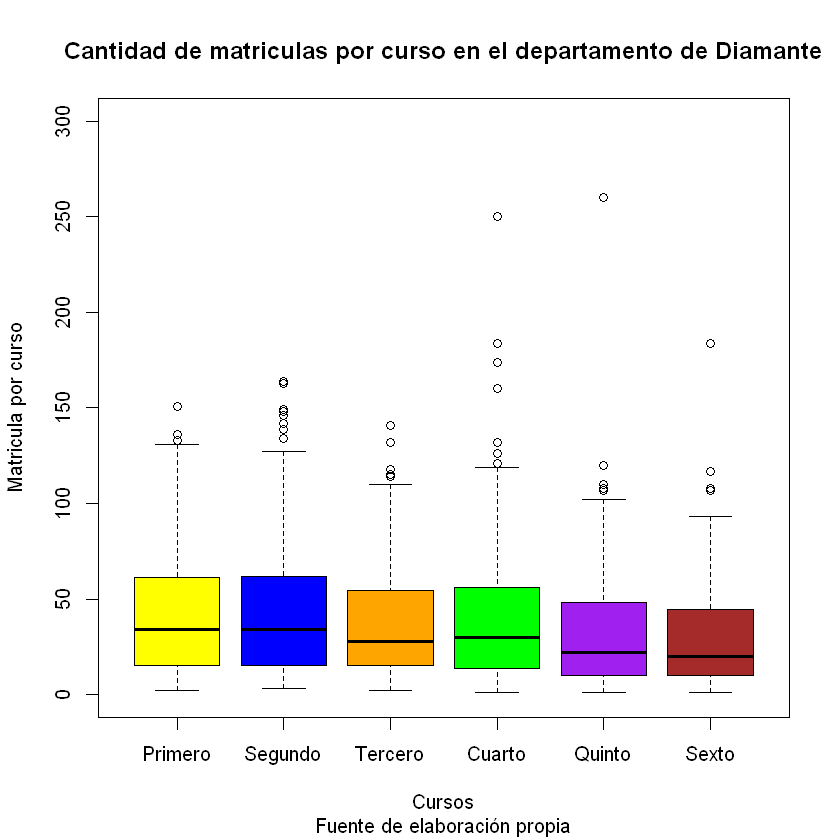

In [58]:
boxplot(matricula_curso$matricula ~ matricula_curso$curso, 
        col = c("yellow", "blue", "orange","green","purple","brown"), 
        ylim = c(0,300),
        ylab = "Matricula por curso", 
        xlab="Cursos",
        sub="Fuente de elaboración propia",
        main="Cantidad de matriculas por curso en el departamento de Diamante")

In [62]:
matricula_curso %>% group_by(curso) %>%
  summarise(mean = round(mean(matricula),1), datos = n())
#Genero el modelo de ANOVA
fm = aov( matricula ~ curso )
summary(fm) # pvalor < 0.05 rechazamos H0 y existe al menos una de las medias que difiere en cuanto a las otras

curso,mean,datos
Primero,42.8,191
Segundo,44.1,191
Tercero,38.2,191
Cuarto,40.9,191
Quinto,34.0,191
Sexto,31.0,191


              Df  Sum Sq Mean Sq F value   Pr(>F)    
curso          5   25381    5076   4.522 0.000436 ***
Residuals   1140 1279695    1123                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [66]:
TukeyHSD(fm, "curso", conf.level = .95)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = matricula ~ curso)

$curso
                      diff         lwr        upr     p adj
Primero-Cuarto    1.848168  -7.9386061 11.6349412 0.9945532
Quinto-Cuarto    -6.900524 -16.6872972  2.8862501 0.3355850
Segundo-Cuarto    3.204188  -6.5825852 12.9909622 0.9375423
Sexto-Cuarto     -9.968586 -19.7553601 -0.1818127 0.0430210
Tercero-Cuarto   -2.774869 -12.5616428  7.0119046 0.9658591
Quinto-Primero   -8.748691 -18.5354648  1.0380826 0.1103393
Segundo-Primero   1.356021  -8.4307527 11.1427946 0.9987533
Sexto-Primero   -11.816754 -21.6035276 -2.0299803 0.0077348
Tercero-Primero  -4.623037 -14.4098103  5.1637370 0.7577216
Segundo-Quinto   10.104712   0.3179384 19.8914857 0.0383556
Sexto-Quinto     -3.068063 -12.8548365  6.7187108 0.9477748
Tercero-Quinto    4.125654  -5.6611192 13.9124281 0.8353417
Sexto-Segundo   -13.172775 -22.9595485 -3.3860012 0.0017872
Tercero-Segundo  -5.979058 -15.7658313

In [65]:
#Analizamos los supuestos
shapiro.test(matricula_curso$matricula[matricula_curso$curso == "Primero"])
shapiro.test(matricula_curso$matricula[matricula_curso$curso == "Segundo"])
shapiro.test(matricula_curso$matricula[matricula_curso$curso == "Tercero"])
shapiro.test(matricula_curso$matricula[matricula_curso$curso == "Cuarto"])
shapiro.test(matricula_curso$matricula[matricula_curso$curso == "Quinto"])
shapiro.test(matricula_curso$matricula[matricula_curso$curso == "Sexto"])



	Shapiro-Wilk normality test

data:  matricula_curso$matricula[matricula_curso$curso == "Primero"]
W = 0.89376, p-value = 2.042e-10



	Shapiro-Wilk normality test

data:  matricula_curso$matricula[matricula_curso$curso == "Segundo"]
W = 0.87039, p-value = 9.915e-12



	Shapiro-Wilk normality test

data:  matricula_curso$matricula[matricula_curso$curso == "Tercero"]
W = 0.88163, p-value = 4.045e-11



	Shapiro-Wilk normality test

data:  matricula_curso$matricula[matricula_curso$curso == "Cuarto"]
W = 0.82117, p-value = 4.805e-14



	Shapiro-Wilk normality test

data:  matricula_curso$matricula[matricula_curso$curso == "Quinto"]
W = 0.79489, p-value = 4.215e-15



	Shapiro-Wilk normality test

data:  matricula_curso$matricula[matricula_curso$curso == "Sexto"]
W = 0.84145, p-value = 3.755e-13


In [67]:
#Test no parametrico Kruskal Wallis
kruskal.test(matricula_curso$curso,matricula_curso$matricula)


	Kruskal-Wallis rank sum test

data:  matricula_curso$curso and matricula_curso$matricula
Kruskal-Wallis chi-squared = 174.34, df = 140, p-value = 0.02594


In [69]:
#Analisis a posteriori
pairwise.wilcox.test(matricula_curso$matricula,matricula_curso$curso)


	Pairwise comparisons using Wilcoxon rank sum test 

data:  matricula_curso$matricula and matricula_curso$curso 

        Primero Segundo Tercero Cuarto Quinto
Segundo 1.0000  -       -       -      -     
Tercero 1.0000  1.0000  -       -      -     
Cuarto  1.0000  1.0000  1.0000  -      -     
Quinto  0.0513  0.0205  0.4213  0.3268 -     
Sexto   0.0051  0.0015  0.0732  0.0513 1.0000

P value adjustment method: holm 